<a href="https://colab.research.google.com/github/Vivek-afk81/Flavour_Fusion/blob/main/llm_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(" working directory:", os.getcwd())

 working directory: /content


In [3]:
import os
os.chdir("/content/drive/MyDrive/build_llm_from_scratch")
print("Now working in:", os.getcwd())

Now working in: /content/drive/MyDrive/build_llm_from_scratch


In [4]:
!ls


 bpe_tokenizer.json			'The Call of the Wild.txt'
 data_preprocessing_pipeline_llm.ipynb	 the-verdict.txt
 llm_scratch.ipynb			'vector embeddings.ipynb'


In [5]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()
print(f"the total no of characters are : {len(raw_text)}")
print(raw_text[:99])

the total no of characters are : 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [6]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)


# Let’s modify the regular expression splits on whitespaces (\s), commas, and periods ([,.]):
"""Match either
a comma or period followed by a space
or any whitespace character
and capture it"""

result2= re.split(r'([,.] | \s)',text)
print(result2)

# removing the whitespace characters
result3=[item for item in result if item.strip()]
print(result3)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']
['Hello', ', ', 'world', '. ', 'This', ', ', 'is a test.']
['Hello,', 'world.', 'This,', 'is', 'a', 'test.']


##REMOVING WHITESPACES OR NOT
 When developing a simple tokenizer, whether we should encode
 whitespaces as separate characters or just remove them depends on our application and its requirements. Removing whitespaces reduces the memory and
 computing requirements. However, keeping whitespaces can be useful if we
 train models that are sensitive to the exact structure of the text (for example,
 Python code, which is sensitive to indentation and spacing). Here, we remove
 whitespaces for simplicity and brevity of the tokenized outputs. Later, we will
 switch to a tokenization scheme that includes whitespaces.

In [7]:
text="Hello, world. This, is a test."
result= re.split(r'([,. :;? !" ( ) \']| -- /\s)',text)
result=[item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [8]:
#Applying this process to raw text

preprocessed=re.split(r'([,. :;? !" ( ) \']| -- /\s)',raw_text)
preprocessed=[item for item in preprocessed if item.strip()]
print(preprocessed[:30])
len(preprocessed)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius--though', 'a', 'good', 'fellow', 'enough--so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his']


4467

#Step 2: Creating Token Ids

let’s convert these tokens from a Python string to an integer representation to
produce the token IDs. This conversion is an intermediate step before converting the
token IDs into embedding vectors.

In [9]:
all_words = sorted(set(preprocessed))
vocab_size=len(all_words)

vocab_size

1222

In [10]:
vocab= {token:integer for integer,token in enumerate(all_words)}
vocab


{'\n\nA': 0,
 '\n\nAnd': 1,
 '\n\nAs': 2,
 '\n\nBut': 3,
 '\n\nFor': 4,
 '\n\nGisburn': 5,
 '\n\nHe': 6,
 '\n\nHis': 7,
 '\n\nI': 8,
 '\n\nIn': 9,
 '\n\nIt': 10,
 '\n\nMrs': 11,
 '\n\nOf': 12,
 '\n\nPoor': 13,
 '\n\nShe': 14,
 '\n\nThe': 15,
 '\n\nWell': 16,
 '\n\nWell--it': 17,
 '\n\nYes--I': 18,
 '!': 19,
 '"': 20,
 "'": 21,
 '(': 22,
 ')': 23,
 ',': 24,
 '--and': 25,
 '--even': 26,
 '--she': 27,
 '--that': 28,
 '.': 29,
 ':': 30,
 ';': 31,
 '?': 32,
 'A': 33,
 'Ah': 34,
 'Ah--I': 35,
 'Among': 36,
 'And': 37,
 'Are': 38,
 'Arrt': 39,
 'At': 40,
 'Be': 41,
 'Begin': 42,
 'Burlington': 43,
 'But': 44,
 'By': 45,
 'Carlo': 46,
 'Chicago': 47,
 'Claude': 48,
 'Come': 49,
 'Croft': 50,
 'Destroyed': 51,
 'Devonshire': 52,
 'Don': 53,
 'Dubarry_': 54,
 'Emperors': 55,
 'Florence': 56,
 'For': 57,
 'Gallery': 58,
 'Gideon': 59,
 'Gisburn': 60,
 'Gisburn--as': 61,
 'Gisburn--fond': 62,
 'Gisburns': 63,
 'Grafton': 64,
 'Greek': 65,
 'Grindle': 66,
 'Grindles': 67,
 'HAD': 68,
 'Had': 69,
 '

In [11]:
for i,item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('\n\nA', 0)
('\n\nAnd', 1)
('\n\nAs', 2)
('\n\nBut', 3)
('\n\nFor', 4)
('\n\nGisburn', 5)
('\n\nHe', 6)
('\n\nHis', 7)
('\n\nI', 8)
('\n\nIn', 9)
('\n\nIt', 10)
('\n\nMrs', 11)
('\n\nOf', 12)
('\n\nPoor', 13)
('\n\nShe', 14)
('\n\nThe', 15)
('\n\nWell', 16)
('\n\nWell--it', 17)
('\n\nYes--I', 18)
('!', 19)
('"', 20)
("'", 21)
('(', 22)
(')', 23)
(',', 24)
('--and', 25)
('--even', 26)
('--she', 27)
('--that', 28)
('.', 29)
(':', 30)
(';', 31)
('?', 32)
('A', 33)
('Ah', 34)
('Ah--I', 35)
('Among', 36)
('And', 37)
('Are', 38)
('Arrt', 39)
('At', 40)
('Be', 41)
('Begin', 42)
('Burlington', 43)
('But', 44)
('By', 45)
('Carlo', 46)
('Chicago', 47)
('Claude', 48)
('Come', 49)
('Croft', 50)


#**TOKENIZER**

 Let’s implement a complete tokenizer class in Python with an encode method that
 splits text into tokens and carries out the string-to-integer mapping to produce token
 IDs via the vocabulary. In addition, we’ll implement a decode method that carries out
 the reverse integer-to-string mapping to convert the token IDs back into text. The fol
lowing listing shows the code for this tokenizer implementation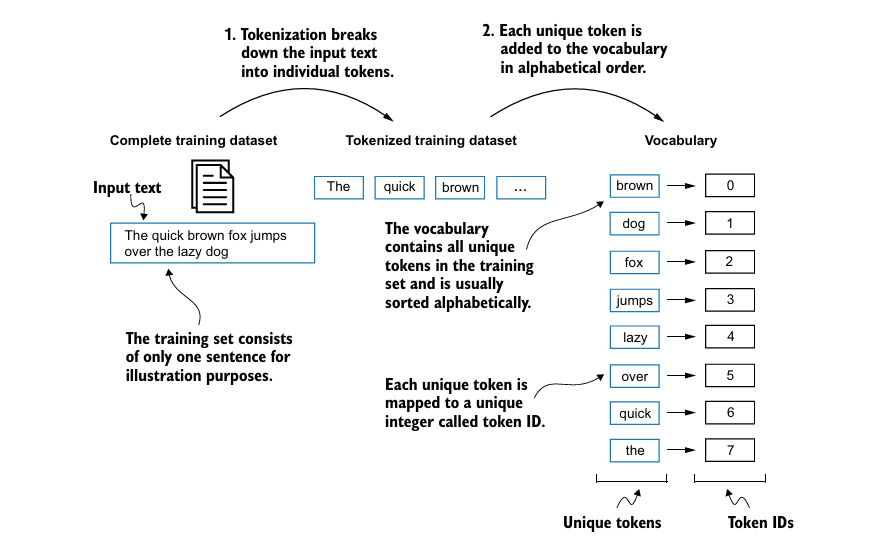

In [12]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed=re.split(r'([,.?_!"()\']|--|\s)',text)
    preprocessed=[item.strip() for item in preprocessed if item.strip()]  #Keep this item only if, after removing whitespace, it is not empty.
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text=" ".join([self.int_to_str[i] for i in ids])     #Converts token ids back to the text
    text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)          #Removes spaces before the specfied punctuation
    return text





Let’s instantiate a new tokenizer object from the SimpleTokenizerV1 class and
 tokenize a passage from Edith Wharton’s short story to try it out in practice:


In [13]:
tokenizer=SimpleTokenizerV1(vocab)
text=""""It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride."""
ids= tokenizer.encode(text)
print(ids)

[20, 79, 21, 932, 1075, 663, 583, 822, 24, 1217, 657, 24, 20, 92, 29, 60, 933, 1199, 832, 876, 29]


In [14]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


##Note =>

Tokenizer implementations share two common methods: an encode method and a decode
method. The encode method takes in the sample text, splits it into individual tokens, and converts the
tokens into token IDs via the vocabulary. The decode method takes in token IDs, converts them back
into text tokens, and concatenates the text tokens into natural text.

In [15]:
text= "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

*We implemented a tokenizer capable of tokenizing and detokenizing text based on a snippet from the training set. Let’s now apply it to a new text sam
ple not contained in the training set:*

 Executing the above code will result in the following error:
 KeyError: 'Hello'

  The problem is that the word “Hello” was not used in the “The Verdict” short story.
 Hence, it is not contained in the vocabulary.

In [16]:
all_tokens=sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>", "In"])
vocab={token:integer for integer, token in enumerate(all_tokens)}

print(len(vocab.items()))

1225


In [17]:
for i,item in enumerate(list(vocab.items())[-5:]):
  print(i,item)

0 ('your', 1220)
1 ('yourself', 1221)
2 ('<|endoftext|>', 1222)
3 ('<|unk|>', 1223)
4 ('In', 1224)


In [18]:
## cell for checking

#**TOKENIZER V2**

now  we adjust the tokenizer
 from code of tokenizerv1 accordingly as shown in the following listing.

In [19]:
class SimpleTokenizerv2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        # Split the text into tokens
        preprocessed = re.split(r'([, .:;?_! "()\']|--|\s)', text)
        # Clean out empty or whitespace-only tokens
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
            ]
        # Replace unknown tokens
        preprocessed = [
            item if item in self.str_to_int else "<|unk|>"
            for item in preprocessed
        ]
        # Convert to IDs
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Remove extra spaces before punctuation
        text = re.sub(r'\s+([, .:;?! "()\'])', r'\1', text)
        return text


In [20]:
#Let’s now try this new tokenizer out in practice. For this, we will use a simple text
 #sample that we concatenate from two independent and unrelated sentences:

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text="<|endoftext|>".join((text1,text2))
print(text)

Hello, do you like tea?<|endoftext|>In the sunlit terraces of the palace.


In [21]:
#let’s tokenize the sample text using the SimpleTokenizerV2 on the vocab we
#previously created

tokenizer=SimpleTokenizerv2(vocab)
print(tokenizer.encode(text))

[1223, 24, 403, 1217, 690, 1062, 32, 1223, 1075, 1041, 1071, 793, 1075, 1223, 29]


In [22]:
#Let’s detokenize the text for a quick sanity check:

#This cell has a bug the vocab has In token but it cant find it replaced it with <|unk|>

print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|unk|> the sunlit terraces of the <|unk|>.


#**Byte pair encoding**

 A more sophisticated tokenization scheme based on a concept called byte
 pair encoding (BPE). The BPE tokenizer was used to train LLMs such as GPT-2, GPT-3,
 and the original model used in ChatGPT.

Since implementing BPE can be relatively complicated, we will use an existing
 Python open source library called tiktoken  (https://github.com/openai/tiktoken)

  which
 implements the BPE algorithm very efficiently based on source code in Rust.

In [23]:
# !pip install tiktoken

In [24]:
import importlib
import tiktoken
print("tiktoken version: ",importlib.metadata.version("tiktoken"))

tiktoken version:  0.12.0


In [25]:
# instantiate the BPE tokenizer
tokenizer=tiktoken.get_encoding("gpt2")

In [26]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
 )
integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [27]:
#We can then convert the token IDs back into text using the decode method, similar to
#our SimpleTokenizerV2:

strings= tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [28]:
 #Let's take another example to illustrate how BPE tokenizer deals with unkonown words

integers=tokenizer.encode("Akjvcbsi jbia")
print(integers)

strings=tokenizer.decode(integers)
print(strings)

[33901, 73, 28435, 1443, 72, 474, 23339]
Akjvcbsi jbia


#Input-Target Pairs

what does input-target pairs looks like

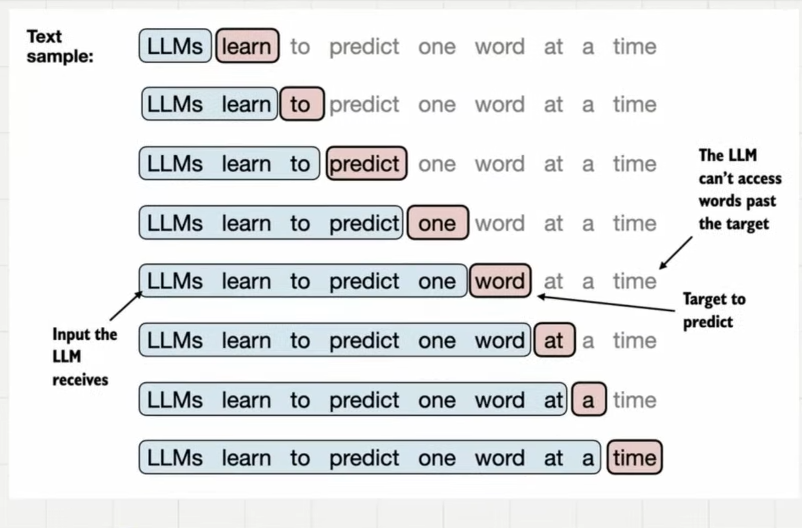

it is called self supervised learning or auto regressive
because we are not labeling the data
we just write a simple code which utilises the structure of sentence itself and classifies the text as labels

In [29]:
# NOW we implement a data loader that fetches the input-target pairs using a sliding
# window approach

# To get sarted, we will first tokenize the whole The Verdict short story we worked
# with earlier using byte-pair(BPE tokenizer)

with open("the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()

enc_text=tokenizer.encode(raw_text)
print(len(enc_text))
print(enc_text[10:])

5145
[257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11, 290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 

In [30]:
enc_sample=enc_text[50:]

In [31]:
# cell for checking
enc_sample[:20]

[290,
 4920,
 2241,
 287,
 257,
 4489,
 64,
 319,
 262,
 34686,
 41976,
 13,
 357,
 10915,
 314,
 2138,
 1807,
 340,
 561,
 423]

One os the most intutive ways to create the input-target pairs for the next prediction task is to create to variables x and y wher x contains the input tokens and y contains the targets, which are shifted by 1

In [32]:
context_size=4 #length of input

#The context_size of 4 means that the model is trained to look at asequence of 4 words
#to predict the next word in the sequence

x= enc_sample[:context_size]
y=enc_sample[1:context_size+1]

print(f"x:{x}")
print(f"y:     {y}")

x:[290, 4920, 2241, 287]
y:     [4920, 2241, 287, 257]


Processing the inputs along with the targets, which are the inputs shifted by one position, we can then create the next-word prediction tasks as follows:

In [33]:
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]

  print(context,"------>",desired)

[290] ------> 4920
[290, 4920] ------> 2241
[290, 4920, 2241] ------> 287
[290, 4920, 2241, 287] ------> 257


In [34]:
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]

  print(tokenizer.decode(context),"------>",tokenizer.decode([desired]))



 and ------>  established
 and established ------>  himself
 and established himself ------>  in
 and established himself in ------>  a


We’ve now created the input–target pairs that we can use for LLM training in upcoming chapters.

There is only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that iterates over the input–target pairs and returns them as PyTorch tensors, which can be thought of as multidimensional arrays.

In particular, we are interested in returning two tensors:
an input tensor containing the text that the LLM sees, and a target tensor containing the text that the LLM is trained to predict.

#IMPLEMENTING A DATA LOADER



For the efficient data loader implementation, we will use PyTorch's built-in Dataset and DataLoader classes.



Step 1: Tokenize the entire text

Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length

Step 3: Return the total number of rows in the dataset

Step 4: Return a single row from the dataset


---


---

To implement efficient dataloaders we collect inputs in tensor x where each row represents one input context .the second tensor y contains the corresponding prediction targets(next words) which are created by shifting the input one by one




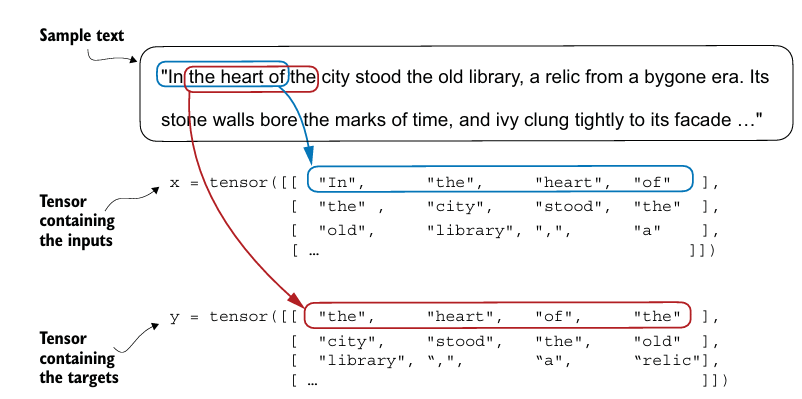

In [35]:
import torch
from torch.utils.data import Dataset,DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the text into overlapping sequences
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i : i + max_length]
            target_chunk = token_ids[i + 1 : i + 1 + max_length]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
##A map-style dataset is one that implements the _getitem_() and len_() protocols, and represents a map from
#(possibly non-integral) indices/keys to data samples.

The GPTDatasetV1 class in listing 2.5 is based on the PyTorch Dataset class.

It defines how individual rows are fetched from the dataset.

Each row consists of a number of token IDs (based on a max_Jength) assigned to an input_chunk tensor.

The target_chunk tensor contains the corresponding targets.


In [36]:
# testing cell

The following code will use the GPTDatasetV1 to load the inputs in batches via a PyTorch DataLoader:

Step 1: Initialize the tokenizer

Step 2: Create dataset

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training

Step 4: The number of CPU processes to use for preprocessing

In [37]:
def create_dataloader_v1(
    txt,
    batch_size=4,
    max_length=256,
    stride=128,
    shuffle=True,
    drop_last=True,
    num_workers=0
):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers,
    )

    return dataloader

Let's test the dataloader with a batch size of 1 for an LLM with a context size of 4,

This will develop an intuition of how the GPTDatasetV1 class and the create_dataloader_v1 function work together:

In [38]:
with open("the-verdict.txt",'r',encoding='utf-8') as f:
  raw_text=f.read()

Convert the dataloader into a python iterator to fetch the next entry via python'd built in next() function


In [39]:
import torch
print("torch version",torch.__version__)

dataloader=create_dataloader_v1(
    raw_text,batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter=iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

torch version 2.9.0+cpu
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


The first_batch variable contains two tensors: the first tensor stores the input token IDs, and the second tensor stores the target token IDs.

Since the max_length is set to 4, each of the two tensors contains 4 token IDs.

Note that an input size of 4 is relatively small and only chosen for illustration purposes. It is common to train LLMs with input sizes of at least 256.

In [40]:
second_batch=next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


When we compare the first batch with the second batch, we can see that the second batch’s token IDs are shifted by one position relative to the first batch.

For example, the second token ID in the first batch’s input is 367, which becomes the first token ID of the second batch’s input. This behavior occurs because the stride setting dictates how many positions the input window shifts between batches, effectively emulating a sliding window over the token sequence.

Batch sizes of 1, such as those we have sampled from the data loader so far, are useful for illustration purposes and for understanding how the data is structured.

If you have previous experience with deep learning, you may know that smaller batch sizes require less memory during training, but they often lead to noisier model updates. Larger batch sizes, on the other hand, provide more stable gradient estimates but require more memory.

Just like in standard deep learning workflows, the batch size is a trade-off and an important hyperparameter to experiment with when training large language models.

Before we move on to the final two sections of this chapter, which focus on creating embedding vectors from token IDs, let’s briefly examine how the data loader behaves when sampling with a batch size greater than 1.


In [41]:
dataloader = create_dataloader_v1(raw_text, batch_size =8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)



Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


###Creating Token Embeddings


For the sake of simplicity and illustration purposes, suppose we have a small vocabulary of only 6 words (instead of the 50,257 words in the BPE tokenizer
vocabulary), and we want to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

Using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility purposes:

In [42]:
input_ids=torch.tensor([2,3,5,1])

In [43]:
vocab_size=6
output_dim=3

torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size,output_dim)


In [44]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [46]:
print(embedding_layer(torch.tensor([2,3,5,1])))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


###Positional Encoding

Previously, we focused on very small embedding sizes in this chapter for illustration purposes.

We now consider more realistic and useful embedding sizes and encode the input tokens into a 256-dimensional embedding space.

This is smaller than what the original GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions), but it is sufficiently large to demonstrate the core ideas while remaining computationally efficient.

Furthermore, we assume that the token IDs were created by the BPE tokenizer that we implemented earlier, which maps raw text into a sequence of discrete token indices suitable for embedding lookup.

In [47]:
vocab_size=50257
output_dim=256

token_embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

Using the token_embedding_layer above, if we sample data from the data loader, we embed each token in each batch into a 256-dimensional vector.

With a batch size of 8 and four tokens per sequence, the resulting embedded output will be an 8 × 4 × 256 tensor.

Let’s instantiate the data loader (data sampling with a sliding window) first:

In [48]:
max_length=4
dataloader=create_dataloader_v1(
    raw_text,batch_size=8,max_length=max_length,stride=max_length,shuffle=False

)
data_iter=iter(dataloader)
inputs,targets=next(data_iter)

In [49]:
print("Token IDs:\n",inputs)
print("\nInputs shape:\n",inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


As we can see, the token ID tensor is 8 × 4–dimensional, meaning that the data batch consists of 8 text samples, each containing 4 tokens.

Let’s now use the embedding layer to embed these token IDs into 256-dimensional vectors:

In [50]:
token_embeddings=token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])



For a GPT model’s absolute positional embedding approach, we simply need to create another embedding layer that has the same dimensionality as the token embeddings.

In [51]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,output_dim) #has the random values that we will optimize in training [part ]

In [52]:
pos_embeddings=pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


As shown in the preceding code example, the input to the pos_embeddings layer is usually a placeholder vector consisting of a sequence of numbers 0, 1, …, up to the maximum input length − 1.

The context_length is a variable that represents the maximum supported input size of the LLM.

Here, we choose it to be similar to the maximum length of the input text.

In practice, the input text can be longer than the supported context length, in which case we have to truncate the input or split it into multiple segments.

As we can see, the positional embedding tensor consists of four 256-dimensional vectors. We can now add these directly to the token embeddings, where Pytorch will add the 4 × 256–dimensional positional embedding tensor to each 4 × 256–dimensional token embedding tensor to incorporate positional information into the model.

In [53]:
input_embeddings=token_embeddings+pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


#IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

Consider the following input sentence, which has already been embedded into 3- dimensional vectors.

We choose a small embedding dimension for illustration purposes to ensure it fits on the page without line breaks:

In [54]:
inputs=torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

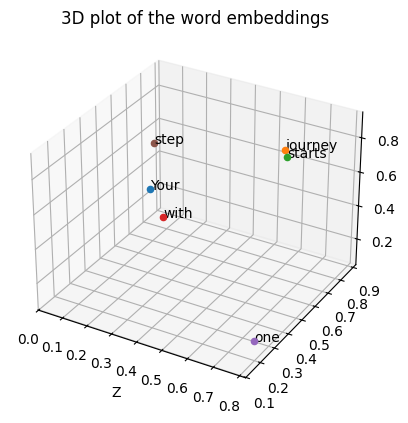

In [55]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

#Corresponding words

words=['Your','journey','starts','with','one','step']

#extract x,y,z coordinates
x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()

#Create 3Dplot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

#plot each point and annotate with corresponding word

for x,y,z,word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

#Set labels for axes
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("Z")

plt.title('3D plot of the word embeddings')
plt.show()

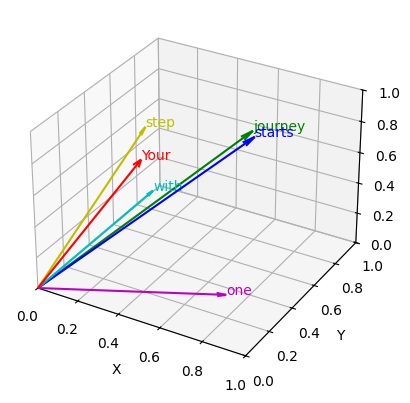

In [56]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z)
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Show the plot
plt.show()


In [57]:
query=inputs[1] #2nd input token is the query

attn_scores_2=torch.empty(inputs.shape[0])  #empty tensor
for i,x_i in enumerate(inputs):
  attn_scores_2[i]=torch.dot(x_i,query) #dot product

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In the next step we normalize each of the attention scores that we computed above

The main goal behind the normalization is to obtain attention
weights that sum up to 1. This normalization is a convention that is useful for interpre
tation and maintaining training stability in an LLM.

In [58]:
attn_weights_2_tmp=attn_scores_2/attn_scores_2.sum()

print("Attention weights:",attn_weights_2_tmp)
print("Sum: ",attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


It’s more common and advisable to use the softmax function for normal
ization. This approach is better at managing extreme values and offers more favorable
gradient properties during training.

 in practice, it’s advisable to use the PyTorch
implementation of softmax, which has been extensively optimized for performance:

In [59]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)
attn_weights_2_naive=softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [60]:
#implementation of pytorch softmax
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


The context vector z(2)is calculated as a weighted sum of all input vectors.

This involves multiplying each input vector by its corresponding attention weight:

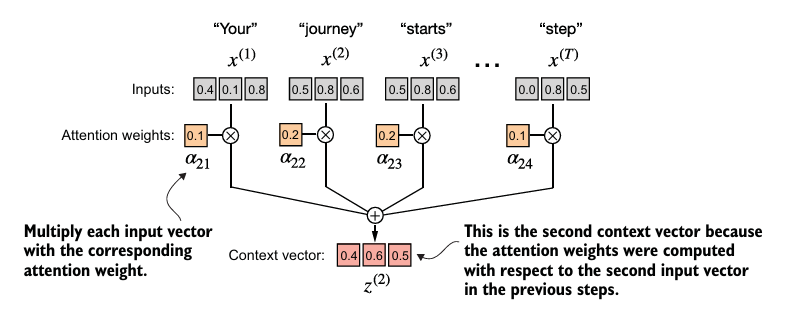

In [61]:
query=inputs[1]

context_vec_2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2+=attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


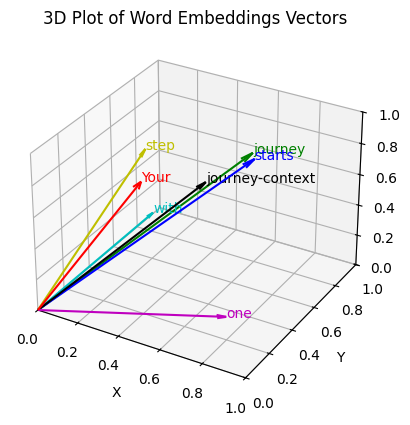

In [62]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input embeddings (7 words, 3 dimensions)
inputs1 = torch.tensor([
    [0.43, 0.15, 0.89],   # Your
    [0.55, 0.87, 0.66],   # journey
    [0.57, 0.85, 0.64],   # starts
    [0.22, 0.58, 0.33],   # with
    [0.77, 0.25, 0.10],   # one
    [0.05, 0.80, 0.55],   # step
    [0.4419, 0.6515, 0.5683]  # journey-context
])

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs1[:, 0].numpy()
y_coords = inputs1[:, 1].numpy()
z_coords = inputs1[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Plot vectors and annotate words
for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(
        0, 0, 0,          # origin
        x, y, z,          # vector direction
        color=color,
        arrow_length_ratio=0.05
    )
    ax.text(x, y, z, word, fontsize=10, color=color)

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings Vectors')
plt.show()


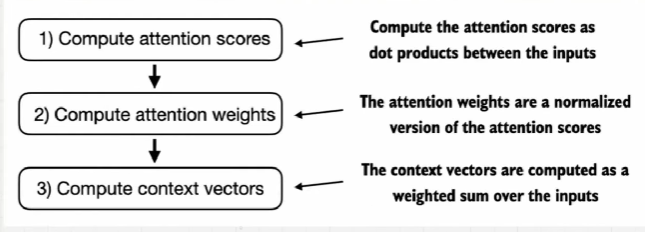

In [63]:
attn_scores=torch.empty(6,6)

for i,x_i in enumerate(inputs):
  for j,x_j in enumerate(inputs):
    attn_scores[i,j]=torch.dot(x_i,x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [64]:
attn_scores=inputs@inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [65]:
#now we normalize

attn_weights = torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


 the dim parameter in functions like torch.softmax
specifies the dimension of the input tensor along which the function will be com
puted. By setting dim=-1, we are instructing the softmax function to apply the nor
malization along the last dimension of the attn_scores tensor. If attn_scores is a
two-dimensional tensor (for example, with a shape of [rows, columns]), it will nor
malize across the columns so that the values in each row (summing over the column
dimension) sum up to 1.

In [66]:
row_2_sum = sum( [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim =- 1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [67]:
all_context_vecs=attn_weights@ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [68]:
print("previous 2nd context vector:", context_vec_2)

previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


#Implementing self-attention with trainable weights

This
self-attention mechanism is also called scaled dot-product attention.

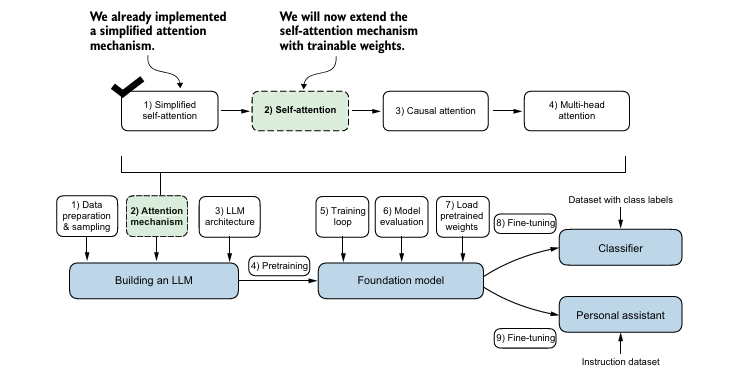

In [71]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your    (x^1)

   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)

   [0.22, 0.58, 0.33], # with    (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)




In [72]:
x_2 = inputs[1]  #The second input element

d_in = inputs.shape[1]  #The input embedding size d=3
d_out = 2 # The output embedding size, d_out=2

In [74]:
torch.manual_seed(123)
"""We set requires_grad=False to reduce clutter in the outputs
but if we were to use
the weight matrices for model training, we would set requires_grad=True to update
these matrices during model training.
"""
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key= torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [76]:
W_query,W_key,W_value

(Parameter containing:
 tensor([[0.2961, 0.5166],
         [0.2517, 0.6886],
         [0.0740, 0.8665]]),
 Parameter containing:
 tensor([[0.1366, 0.1025],
         [0.1841, 0.7264],
         [0.3153, 0.6871]]),
 Parameter containing:
 tensor([[0.0756, 0.1966],
         [0.3164, 0.4017],
         [0.1186, 0.8274]]))

In [75]:
query_2= x_2 @ W_query
key_2=x_2@ W_key
value_2=x_2@ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [77]:
#obtaining all keys and values via matrix multiplication

keys=inputs @W_key
values=inputs @ W_value

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


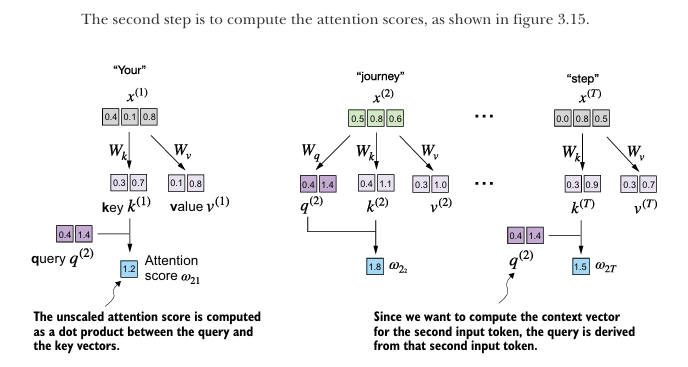

In [78]:
keys_2=keys[1]
attn_score_22=query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [79]:
#all attention scores via matrix multiplication:

attn_scores_2=query_2@ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


we scale the attention scores by dividing
them by the square root of the embedding dimension of the keys (taking the square
root is mathematically the same as exponentiating by 0.5):

## The rationale behind scaled-dot product attention

### The Problem
- In self-attention, we compare tokens using **dot products**.
- Embedding sizes in modern models can be very large (often 1000+).
- Large vectors → **large dot-product values**.

### Why is that bad?
After computing scores, we apply **softmax** to convert them into probabilities.

If numbers are too big:
- Softmax becomes almost **0 or 1**.
- Gradients become **tiny**.
- Learning becomes **slow or may stall**.



### The Fix: Scaling
We divide the scores by the square root of the key dimension.

$$
\text{Attention}(Q, K, V) =
\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
$$


- \(d_k\) = size of the key vectors.
- Scaling keeps values in a **reasonable range**.
- Softmax stays smooth → **gradients remain healthy**.



### Simple Analogy
Think of a speaker volume knob:
- Huge scores → always max volume.
- After scaling → volume can change smoothly.
- More nuance, better learning.



## Numerical Example

### Without Scaling
Let \(d_k = 1024\) and a dot product ≈ **50**.

$$
\text{softmax}([50, 1, 0]) \approx [1, 0, 0]
$$

- One value dominates.
- Model becomes too confident.
- Gradients ≈ 0.



### With Scaling
$$
\sqrt{1024} = 32,\quad 50/32 \approx 1.56
$$

$$
\text{softmax}([1.56, 1, 0]) \approx [0.46, 0.28, 0.26]
$$

- Much smoother.
- Learning can continue.




In [80]:
d_k=keys.shape[-1]

attn_weights_2=torch.softmax(attn_scores_2/d_k**.5,dim=-1)
attn_weights_2

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])

In [81]:
context_vec_2 = attn_weights_2 @ values  #attention weight for journey @ values matrix
print(context_vec_2)

tensor([0.3061, 0.8210])


**Why query, key, and value?**

- Query → Think of it like a search question. It’s the word the model is currently looking at and asking: “Who should I pay attention to in the sentence?”
- Key → Like an index in a database. Every word has a key that helps the model decide if it matches the current query.
- Value → The actual information carried by the word. Once the model decides which keys match the query, it pulls out the values (the content) to use.


##Implementing a compact self-attention Python class

In [86]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_query=nn.Parameter(torch.rand(d_in,d_out))
    self.W_key=nn.Parameter(torch.rand(d_in,d_out))
    self.W_value=nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,x):
    keys= x @ self.W_key
    values=x @ self.W_value
    queries= x @ self.W_query

    attn_scores= queries @keys.T
    attn_weights=torch.softmax(attn_scores/keys.shape[-1]**.5,dim=-1)

    context_vect= attn_weights @ values
    return context_vect

In [87]:
torch.manual_seed(123)

sa_v1 =SelfAttention_v1(d_in,d_out)
print(sa_v1(inputs))
""" notice that the second row ([0.3061, 0.8210]) matches the con
tents of context_vec_2 in the previous section. """

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


We can improve the SelfAttention_v1 implementation further by utilizing
PyTorch’s nn.Linear layers, which effectively perform matrix multiplication when
the bias units are disabled.

In [88]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
      super().__init__()
      self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
      keys = self.W_key(x)
      queries = self.W_query(x)
      values = self.W_value(x)
      attn_scores = queries @ keys.T
      attn_weights = torch.softmax(
          attn_scores / keys.shape[-1]**0.5, dim=-1
      )
      context_vec = attn_weights @ values

      return context_vec

In [89]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


**Comparing SelfAttention_v1 and SelfAttention_v2**

 In SelfAttention_v1
- Here the weights are stored as (d_in, d_out).

 In SelfAttention_v2,
- PyTorch internally stores weights as (d_out, d_in) (the opposite order).


